# Naive Bayes for classifying the ham and spam

In [109]:
import pandas as pd
import numpy as np

#Visualization Package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Package for Vectorization of text for feature extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [110]:
# Loading the data set
email_data = pd.read_csv("C:/Data Science/Assignments/Naive Bayes/sms_raw_NB.csv",encoding = "ISO-8859-1")
email_data.shape

(5559, 2)

In [111]:
email_data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [151]:
email_data.info

<bound method DataFrame.info of       type                                               text
0      ham                hope having good week just checking
1      ham                                   give back thanks
2      ham                               also doing only have
3     spam  complimentary star ibiza holiday cash needs yo...
4     spam  okmail dear dave this your final notice collec...
...    ...                                                ...
5554   ham  great role model giving much really wish each ...
5555   ham  awesome remember last time somebody high first...
5556  spam  your prize will another customer polo suite lo...
5557  spam  jsco energy high know where channel leadership...
5558   ham                        shall call dear having food

[5559 rows x 2 columns]>

In [27]:
email_data.dtypes

type    object
text    object
dtype: object

In [112]:
#Check for Null Values
email_data['text'].isnull().sum()

0

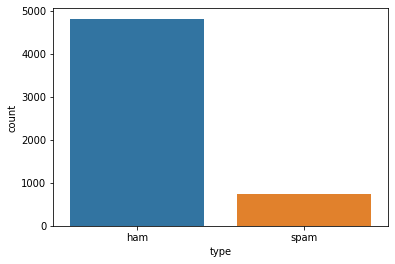

In [29]:
#Plot of Ham and Spam
sns.countplot(email_data['type'],label="count")

In [113]:
#Cleaning the dataset 
#import re
#stop_words = []
#with open("C:\Data Science\Assignments\Text Mining\stop.txt") as f:
#    stop_words = f.read()

In [114]:
# splitting the entire string by giving separator as "\n" to get list of 
# all stop words
#stop_words = stop_words.split("\n")
#print(stop_words)

In [115]:
#Cleaning the dataset 
# Removing unwanted symbols incase if exists
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [122]:
email_data.text = email_data.text.apply(cleaning_text)
print(email_data.text)

0                     hope having good week just checking
1                                        give back thanks
2                                    also doing only have
3       complimentary star ibiza holiday cash needs yo...
4       okmail dear dave this your final notice collec...
                              ...                        
5554    great role model giving much really wish each ...
5555    awesome remember last time somebody high first...
5556    your prize will another customer polo suite lo...
5557    jsco energy high know where channel leadership...
5558                          shall call dear having food
Name: text, Length: 5559, dtype: object


In [123]:
#removing empty rows 
email_data.shape
email_data = email_data.loc[email_data.text != " ",:]

In [124]:
email_data.shape
print(email_data.text)

0                     hope having good week just checking
1                                        give back thanks
2                                    also doing only have
3       complimentary star ibiza holiday cash needs yo...
4       okmail dear dave this your final notice collec...
                              ...                        
5554    great role model giving much really wish each ...
5555    awesome remember last time somebody high first...
5556    your prize will another customer polo suite lo...
5557    jsco energy high know where channel leadership...
5558                          shall call dear having food
Name: text, Length: 5559, dtype: object


In [128]:
# creating a matrix of token counts for the entire text document 
def split_into_words(i):
    return [word for word in i.split(" ")]

In [131]:
#Extract Feature with Count Vectorizer
# Preparing email texts into word count matrix format 
df_x = email_data['text']
df_y = email_data['type']
corpus =df_x
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(analyzer=split_into_words, stop_words="english")
x = cv.fit_transform(corpus)
print(x.shape)
x.toarray()
#cv.get_feature_names()

(5559, 6661)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
# splitting data into train and test data sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,df_y, test_size=0.3, random_state=42)
#X_train

In [134]:
#Model Building
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB as MB

classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

y_predict = classifier_mb.predict(X_test)
#classifier_mb.score(X_test, y_test)
accuracy_test_m = np.mean(y_predict==y_test) 

train_pred_m = classifier_mb.predict(X_train)
accuracy_train_m = np.mean(train_pred_m==y_train) 

print("Naive Bayes train Accuracy:", accuracy_train_m)  # 98.8%
print("Naive Bayes test accuracy:", accuracy_test_m)    # 96%


Naive Bayes train Accuracy: 0.9884348496530455
Naive Bayes test accuracy: 0.9586330935251799


In [135]:
from sklearn import metrics
#Print Consuion Metrics and Classification report
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9586330935251799
[[1409   48]
 [  21  190]]
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1457
        spam       0.80      0.90      0.85       211

    accuracy                           0.96      1668
   macro avg       0.89      0.93      0.91      1668
weighted avg       0.96      0.96      0.96      1668



In [136]:
#Sample Prediction
comment = ["check this out"]
vect = cv.transform(comment).toarray()
classifier_mb.predict(vect)

array(['ham'], dtype='<U4')

In [137]:
#Sample Prediction2
comment1 = ["Great promotional offer $114"]
vect = cv.transform(comment1).toarray()
classifier_mb.predict(vect)

array(['spam'], dtype='<U4')

In [138]:
#Gaussian Naive Bayes Model Building
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb = GB()
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
classifier_gb.fit(X_train.toarray(),y_train) 
y_predictGB = classifier_gb.predict(X_test.toarray())

accuracy_test_m = np.mean(y_predictGB==y_test) 

train_pred_m = classifier_gb.predict(X_train.toarray())
accuracy_train_m = np.mean(train_pred_m==y_train) 

print("Gaussian NB Train Accuracy:", accuracy_train_m)  # 90.5%
print("Gaussian NB Test accuracy:", accuracy_test_m)    # 84.5%

Gaussian NB Train Accuracy: 0.9046517604728862
Gaussian NB Test accuracy: 0.8447242206235012


In [139]:
#classifier_mb.score(X_test, y_test)
print(metrics.accuracy_score(y_test,y_predictGB))
print(metrics.confusion_matrix(y_test,y_predictGB))
print(metrics.classification_report(y_test,y_predictGB))

0.8447242206235012
[[1223  234]
 [  25  186]]
              precision    recall  f1-score   support

         ham       0.98      0.84      0.90      1457
        spam       0.44      0.88      0.59       211

    accuracy                           0.84      1668
   macro avg       0.71      0.86      0.75      1668
weighted avg       0.91      0.84      0.86      1668



In [149]:
# TfidfTransformer, Transform a count matrix to a normalized tf or tf-idf representation
# Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(x)
# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(X_train)

print(train_tfidf.shape) 

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(X_test)

print(test_tfidf.shape) 

(3891, 6661)
(1668, 6661)


In [142]:
# Multinomial Naive Bayes - Model Building
classifier_mb = MB()
classifier_mb.fit(train_tfidf,y_train)
y_predict = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(y_predict==y_test) 

#classifier_mb.score(X_test, y_test)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==y_train) 


print("Multinomial NB Tfid - train Accuracy:", accuracy_train_m)
print("Multinomial NB Tfid - test accuracy:", accuracy_test_m)

Multinomial NB train Accuracy: 0.9660755589822668
Multinomial NB test accuracy: 0.9508393285371702


In [143]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9508393285371702
[[1456    1]
 [  81  130]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1457
        spam       0.99      0.62      0.76       211

    accuracy                           0.95      1668
   macro avg       0.97      0.81      0.87      1668
weighted avg       0.95      0.95      0.95      1668



In [144]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),y_train) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==y_train) 
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==y_test) 

In [146]:
print("Gaussian NB Tfid Train Accuracy:", accuracy_train_g)
print("Gaussian NB Tfid Test Accuracy:", accuracy_test_g)

Gaussian NB Tfid Train Accuracy: 0.9046517604728862
Gaussian NB Tfid Test Accuracy: 0.8393285371702638


In [147]:
print(metrics.accuracy_score(y_test,test_pred_g))
print(metrics.confusion_matrix(y_test,test_pred_g))
print(metrics.classification_report(y_test,test_pred_g))

0.8393285371702638
[[1224  233]
 [  35  176]]
              precision    recall  f1-score   support

         ham       0.97      0.84      0.90      1457
        spam       0.43      0.83      0.57       211

    accuracy                           0.84      1668
   macro avg       0.70      0.84      0.73      1668
weighted avg       0.90      0.84      0.86      1668

